<a href="https://colab.research.google.com/github/jalopezgarcia01/SA_Algorithm/blob/main/SA_plus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***SA Algorithm* en Ingeniería Química**

Autor: *Jesús Armando López García*

Repositorio en Github: *[Algoritmo SA](https://github.com/jalopezgarcia01)*


##Aclaración:

### *El algoritmo mostrado es básicamente el mismo para todos los casos solo mostrando variantes en sus diferentes y posibles comportamientos como por ejemplo:*



1.   Encontrar el Máximo Optimo
2.   Encontrar el Minimo Optimo
3.   Uso de funciones Benchmark 



NOTA: ***Este código es sin fines de lucro y de aporte educativo.***



Todos los derechos reservados

##EJEMPLO:
###Prueba 1
###*Encontrar el minimo de la Función Objetivo*

interación: 0, mejor_solución: [-3.91144232 -1.07798245], optimo: 36.33071257902701
interación: 1, mejor_solución: [0.75098839 0.46906031], optimo: 38.545268063165075
interación: 2, mejor_solución: [-4.5704004   3.81936413], optimo: 46.9029780876645
interación: 3, mejor_solución: [-2.74155526  0.25244815], optimo: 56.11578754024928
interación: 4, mejor_solución: [5. 5.], optimo: 71.47127654414251
interación: 5, mejor_solución: [-1.09767979 -3.0112925 ], optimo: 10.193228402737226
interación: 6, mejor_solución: [ 1.98818336 -1.74510513], optimo: -36.01537777462893
interación: 7, mejor_solución: [2.12003006 4.13860804], optimo: -6.539281036414714
interación: 8, mejor_solución: [-0.4364133   1.92938971], optimo: -12.252831952198594
interación: 9, mejor_solución: [-3.78428405  0.61183977], optimo: 62.543453498612614
interación: 10, mejor_solución: [-0.92650424 -4.01356765], optimo: 12.868143383018403
interación: 11, mejor_solución: [ 0.5519728  -1.48202944], optimo: -4.639256493804483
inte

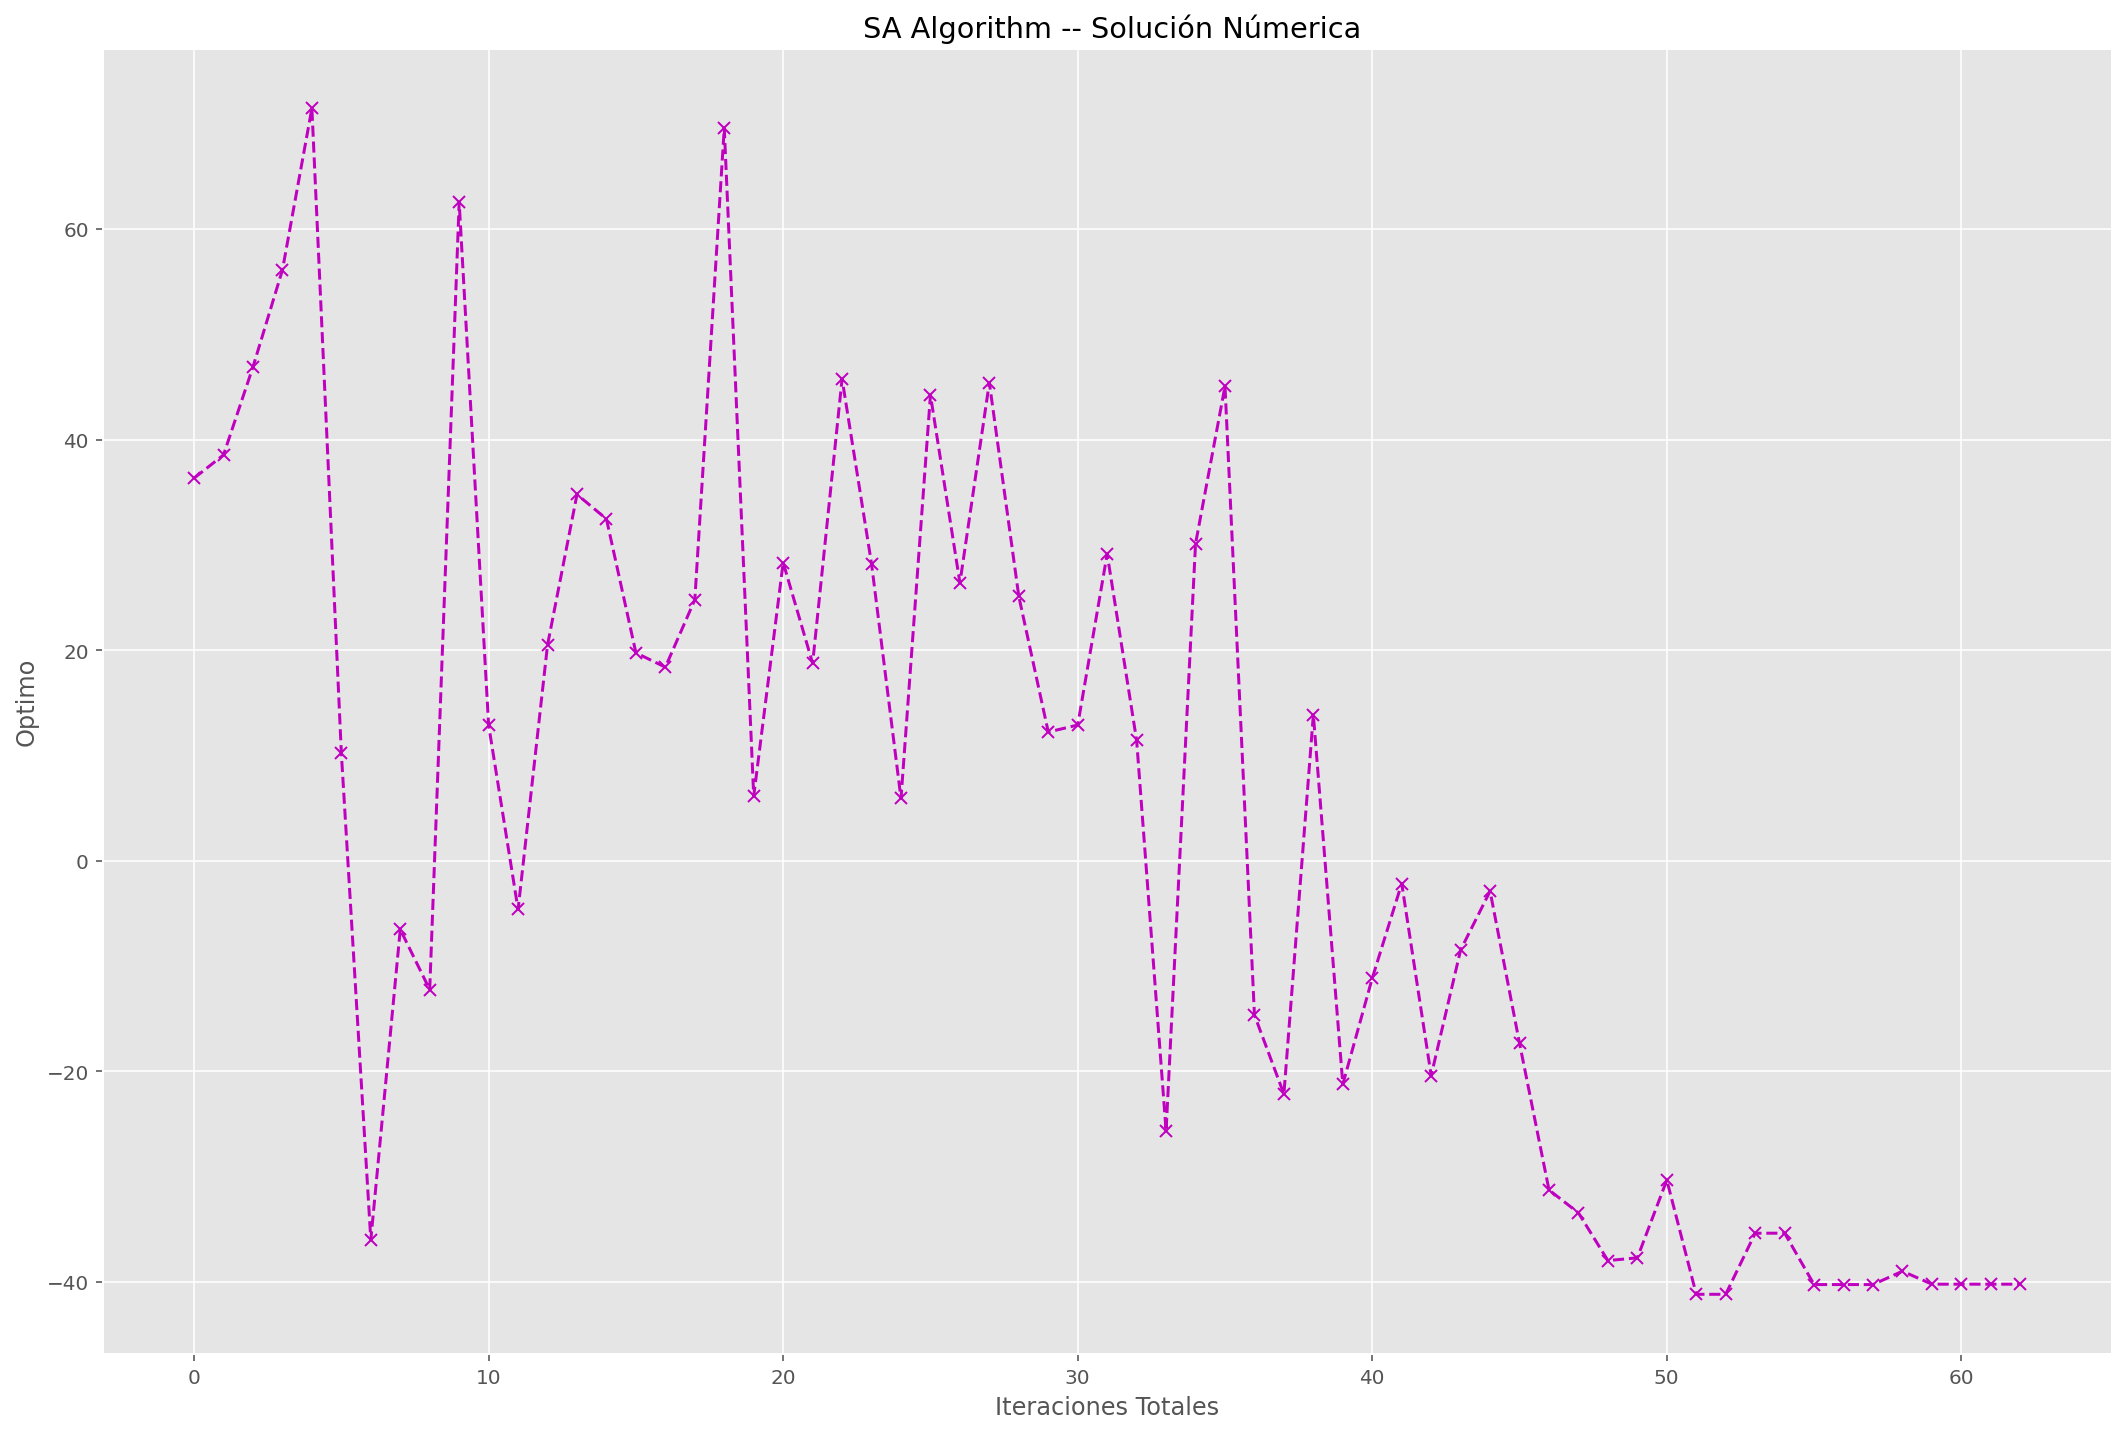

In [37]:

#############################################################################
import time
import math

import numpy as np 
import random

import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm
import matplotlib.gridspec as gridspec
import seaborn as sns

import copy
from tqdm import tqdm

plt.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format ='retina'

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 18, 12

##############################################################################

temperatura_inicial = 400
enfriamiento = 0.85  # coeficiente de enfriamiento/disminucion de temperatura
numero_variables = 2
limite_superior = [5, 5]   
limite_inferior = [-5, -5]  
tiempo_computo = 0.5 # segundos (manipulable/modificable)
 
def funcion_objetivo(X):
    x=X[0]
    y=X[1]
    value = (x**2 + y**2 + 25*(np.sin(x**2) + np.cos(y**2))) #Funciones Benchmark
    return value
 
#((1- x**2) + 100*(y - x**2)**2)
#############################################################################

# SA Algorithm:
solucion_inicial = np.zeros((numero_variables))
for v in range(numero_variables):
    solucion_inicial[v] = random.uniform(limite_inferior[v],limite_superior[v])
     
actual_solucion = solucion_inicial
mejor_solucion = solucion_inicial
n = 1  # no de solciones aceptadas
mas_apta = funcion_objetivo(mejor_solucion)
actual_temperatura = temperatura_inicial # temperatura actual
inicio = time.time()
no_intentos = 400 # numero de intentos en cada nivel de temperatura
record_mas_apta =[]
alfa = 0.3
 
for i in range(999999999):
    for j in range(no_intentos):
 
        for k in range(numero_variables):
            actual_solucion[k] = mejor_solucion[k] + alfa*(random.uniform(limite_inferior[k],limite_superior[k]))
            actual_solucion[k] = max(min(actual_solucion[k],limite_superior[k]),limite_inferior[k])  # Obtenemos la solucion respecto a los limites
  
        actual_apta = funcion_objetivo(actual_solucion)
        E = abs(actual_apta - mas_apta)
        if i == 0 and j == 0:
            EA = E
             
        if actual_apta > mas_apta: #Podemos cambiar <> para obtener el maximo o minimo
            p = math.exp(-E/(EA*actual_temperatura))
            # Tomamos la decision de aceptar la peor solucion o no
            if random.random()<p:
                accept = True # Aceptamos la peor solución
            else:
                accept = False # No acepta la peor solución
        else:
            accept = True # Aceptamos la mejor solución
        if accept==True:
            mejor_solucion = actual_solucion # Actualizamos la mejor solucion
            mas_apta = funcion_objetivo(mejor_solucion)
            n = n + 1 # conteo de solciones aceptadas
            EA = (EA *(n-1) + E)/n # actualizamos EA
                                              #mas_apta = optimo
    print('interación: {}, mejor_solución: {}, optimo: {}'.format(i, mejor_solucion, mas_apta))
    record_mas_apta.append(mas_apta)
    # Temperatura de enfriamiento
    actual_temperatura = actual_temperatura*enfriamiento
    # Parar tiempo de computo
    fin = time.time()
    if fin-inicio >= tiempo_computo:
        break
###############################################################################
plt.plot(record_mas_apta, 'm--x')
plt.title(' SA Algorithm -- Solución Númerica')
plt.xlabel('Iteraciones Totales')
plt.ylabel('Optimo')
plt.grid(True)
############################################################################
#Ya podemos usar el algoritmo jaja
#INGENIERÍA QUÍMICA



### Prueba 2

### *Encontrar el minimo de la Función Objetivo*

interación: 0, mejor_solución: [ 2.34059615 -1.50619227], optimo: -26.333904775383264
interación: 1, mejor_solución: [-5.         -0.71823827], optimo: 43.95371635286981
interación: 2, mejor_solución: [-3.91456393 -4.66880368], optimo: 21.957066272376245
interación: 3, mejor_solución: [-0.01041167 -0.2958482 ], optimo: 24.994645399574683
interación: 4, mejor_solución: [-1.10365397 -3.43766232], optimo: 54.80811249301315
interación: 5, mejor_solución: [4.42769162 1.54655623], optimo: 20.8302625262384
interación: 6, mejor_solución: [-1.85780646 -4.00476258], optimo: -11.783139960803723
interación: 7, mejor_solución: [-1.48200718  3.22460425], optimo: 18.79599330350355
interación: 8, mejor_solución: [4.19619029 5.        ], optimo: 43.73098245623928
interación: 9, mejor_solución: [-0.33031158 -2.56020735], optimo: 33.47040355326791
interación: 10, mejor_solución: [-1.31967849  1.55180422], optimo: 10.21510987286355
interación: 11, mejor_solución: [ 3.47233562 -1.46210255], optimo: -11.419

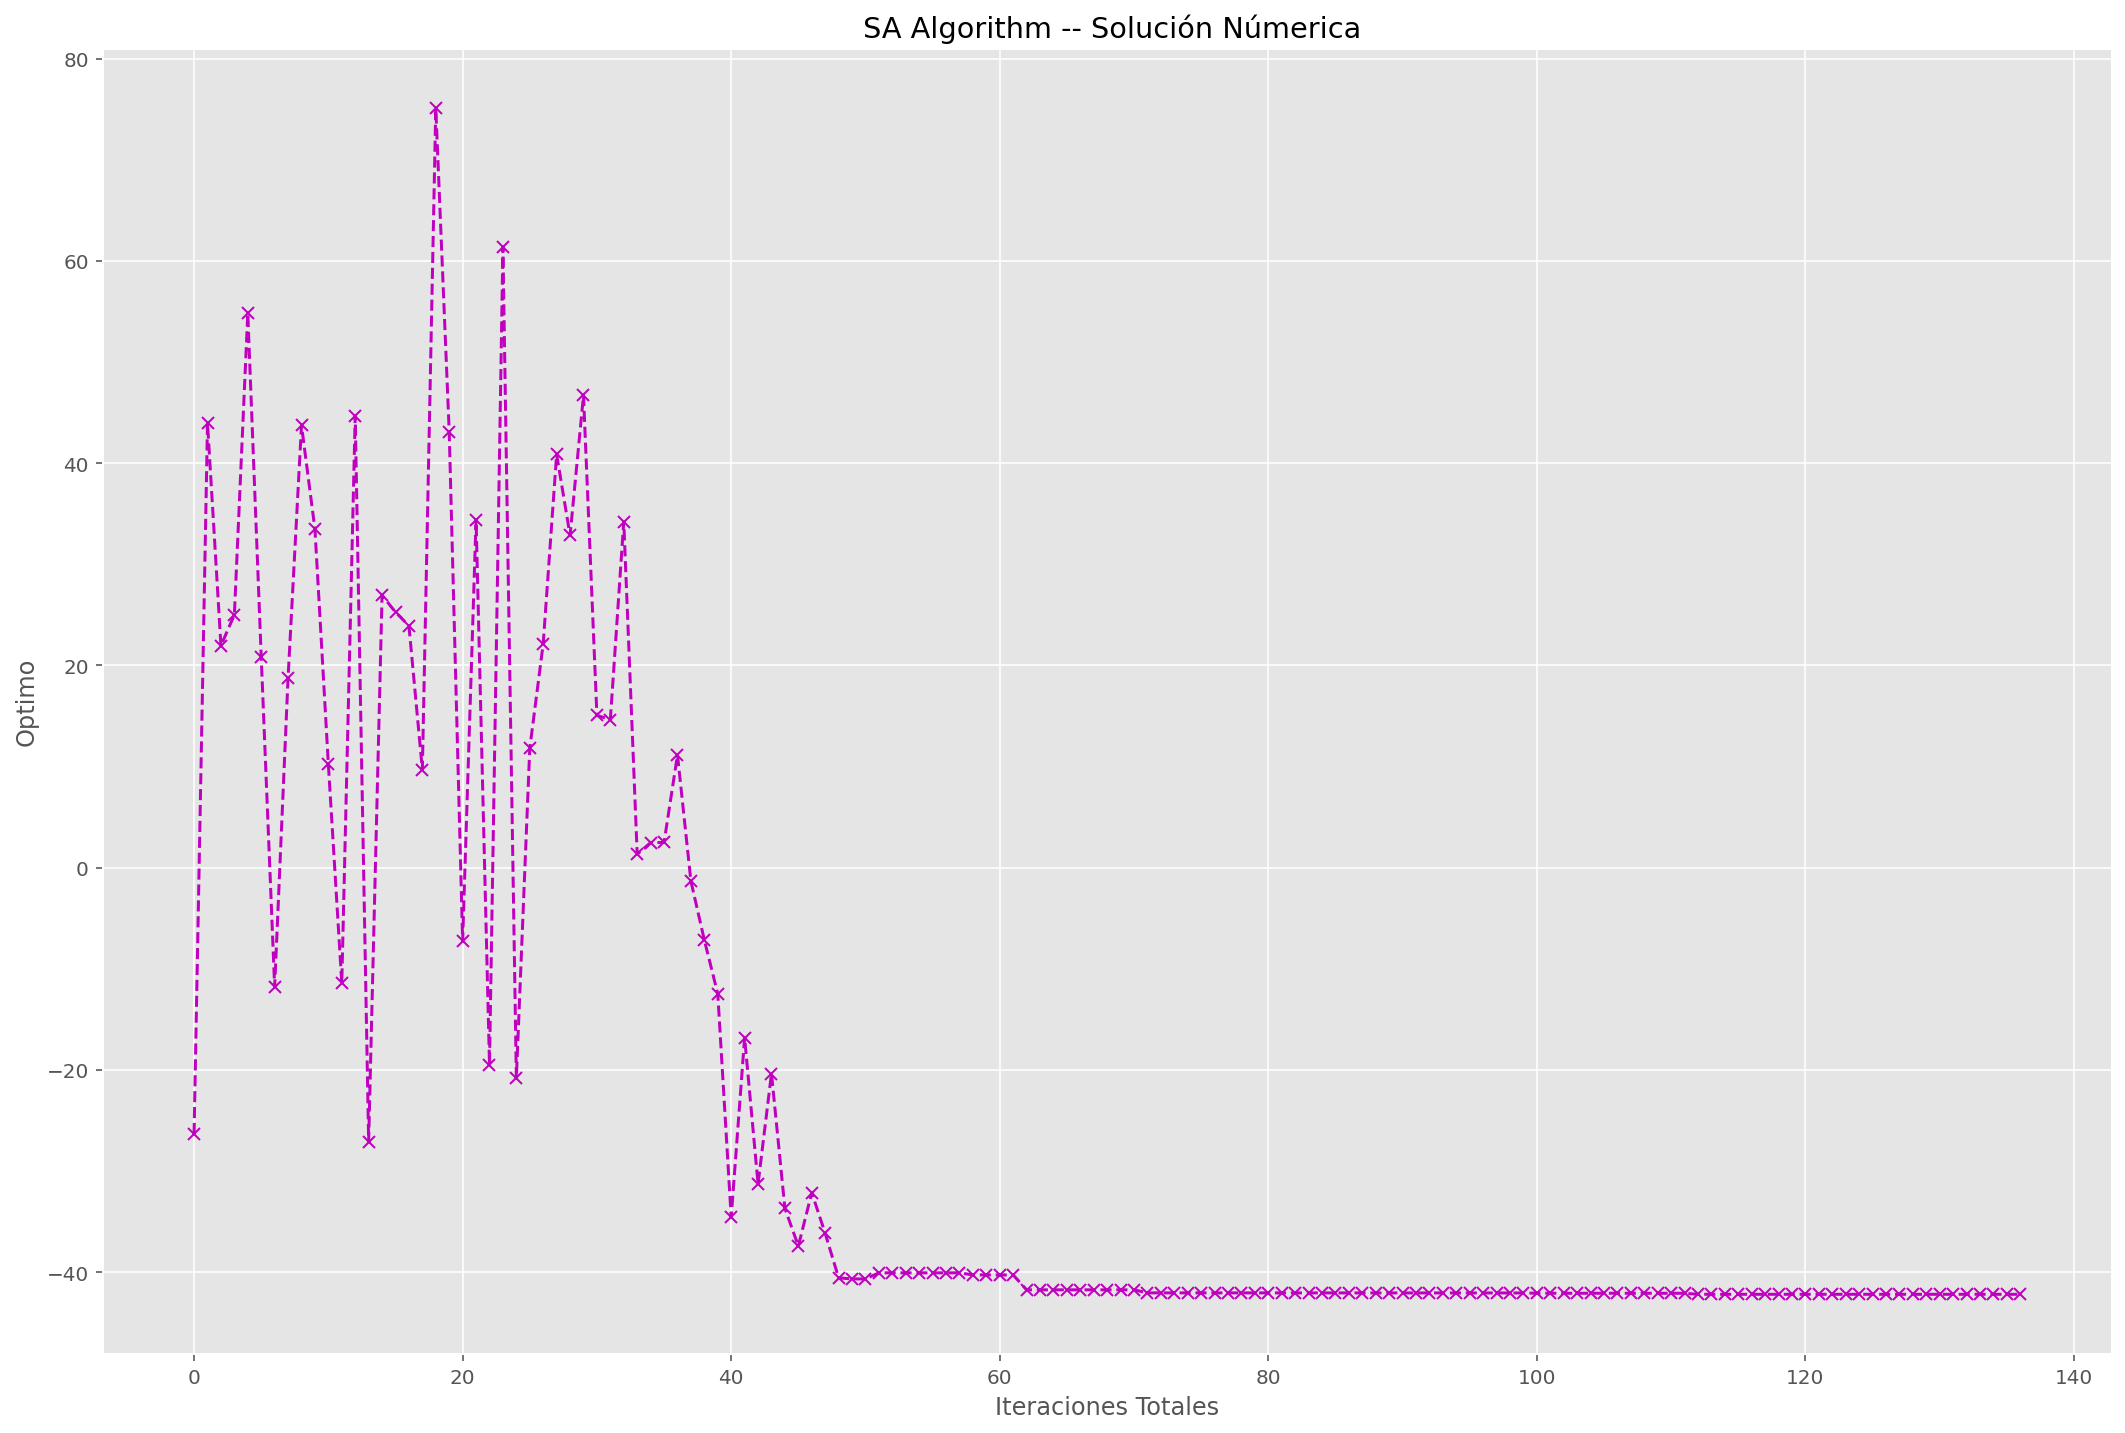

In [33]:

#############################################################################
import time
import math
import numpy as np 
import random

import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm
import matplotlib.gridspec as gridspec
import seaborn as sns

import copy
from tqdm import tqdm

plt.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format ='retina'

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 18, 12

##############################################################################

temperatura_inicial = 400  #PUEDES JUGAR CON LAS TEMPERATURAS A PROBAR
enfriamiento = 0.85  # coeficiente de enfriamiento/disminucion de temperatura
numero_variables = 2
limite_superior = [5, 5]   
limite_inferior = [-5, -5]  
tiempo_computo = 0.5 # segundos 
 
def funcion_objetivo(X):
    x=X[0]
    y=X[1]
    value = (x**2 + y**2 + 25*(np.sin(x**2) + np.cos(y**2))) #Funciones Benchmark
    return value
 
#((1- x**2) + 100*(y - x**2)**2) puedes probar con esta función objetivo en la sección value donde esta comentado ----> #Funciones Benchmark
#############################################################################

# SA Algorithm:
solucion_inicial = np.zeros((numero_variables))
for v in range(numero_variables):
    solucion_inicial[v] = random.uniform(limite_inferior[v],limite_superior[v])
     
actual_solucion = solucion_inicial
mejor_solucion = solucion_inicial
n = 1  # no de solciones aceptadas
mas_apta = funcion_objetivo(mejor_solucion)
actual_temperatura = temperatura_inicial # temperatura actual
inicio = time.time()
no_intentos = 200 # numero de intentos en cada nivel de temperatura
record_mas_apta =[]
alfa = 0.3
 
for i in range(999999999):
    for j in range(no_intentos):
 
        for k in range(numero_variables):
            actual_solucion[k] = mejor_solucion[k] + alfa*(random.uniform(limite_inferior[k],limite_superior[k]))
            actual_solucion[k] = max(min(actual_solucion[k],limite_superior[k]),limite_inferior[k])  # Obtenemos la solucion respecto a los limites
  
        actual_apta = funcion_objetivo(actual_solucion)
        E = abs(actual_apta - mas_apta)
        if i == 0 and j == 0:
            EA = E
             
        if actual_apta > mas_apta: #Podemos cambiar <> para obtener el maximo o minimo
            p = math.exp(-E/(EA*actual_temperatura))
            # Tomamos la decision de aceptar la peor solucion o no
            if random.random()<p:
                accept = True # Aceptamos la peor solución
            else:
                accept = False # No acepta la peor solución
        else:
            accept = True # Aceptamos la mejor solución
        if accept==True:
            mejor_solucion = actual_solucion # Actualizamos la mejor solucion
            mas_apta = funcion_objetivo(mejor_solucion)
            n = n + 1 # conteo de solciones aceptadas
            EA = (EA *(n-1) + E)/n # actualizamos EA
                                              #mas_apta = optimo
    print('interación: {}, mejor_solución: {}, optimo: {}'.format(i, mejor_solucion, mas_apta))
    record_mas_apta.append(mas_apta)
    # Temperatura de enfriamiento
    actual_temperatura = actual_temperatura*enfriamiento
    # Parar tiempo de computo
    fin = time.time()
    if fin-inicio >= tiempo_computo:
        break
#############################################################################
#Graficos
plt.plot(record_mas_apta, 'm--x')
plt.title(' SA Algorithm -- Solución Númerica')
plt.xlabel('Iteraciones Totales')
plt.ylabel('Optimo')
plt.grid(True)

############################################################################
#Ya podemos usar el algoritmo jaja
#INGENIERÍA QUÍMICA



### Prueba 3

### *Encontrar el minimo de la Función Objetivo*

interación: 0, mejor_solución: [ 1.01979006 -3.87056386], optimo: 2411.2960523589973
interación: 1, mejor_solución: [-2.06177839 -0.50580796], optimo: 2259.404776759773
interación: 2, mejor_solución: [-2.26521773  3.70139666], optimo: 200.30579063784035
interación: 3, mejor_solución: [-4.16998351  1.92793826], optimo: 23887.31967369503
interación: 4, mejor_solución: [-0.50083217 -3.90571095], optimo: 1728.4348156714884
interación: 5, mejor_solución: [-3.55589499  5.        ], optimo: 5832.0242192674605
interación: 6, mejor_solución: [2.70881951 0.57156433], optimo: 4571.725760158191
interación: 7, mejor_solución: [-3.86062128 -2.93410847], optimo: 31807.322265193747
interación: 8, mejor_solución: [-3.83886268 -4.16009507], optimo: 35695.77932965948
interación: 9, mejor_solución: [0.59181568 5.        ], optimo: 2162.671163365297
interación: 10, mejor_solución: [5.         2.77723395], optimo: 49361.133089024945
interación: 11, mejor_solución: [-4.51312213  2.05681048], optimo: 33511.59

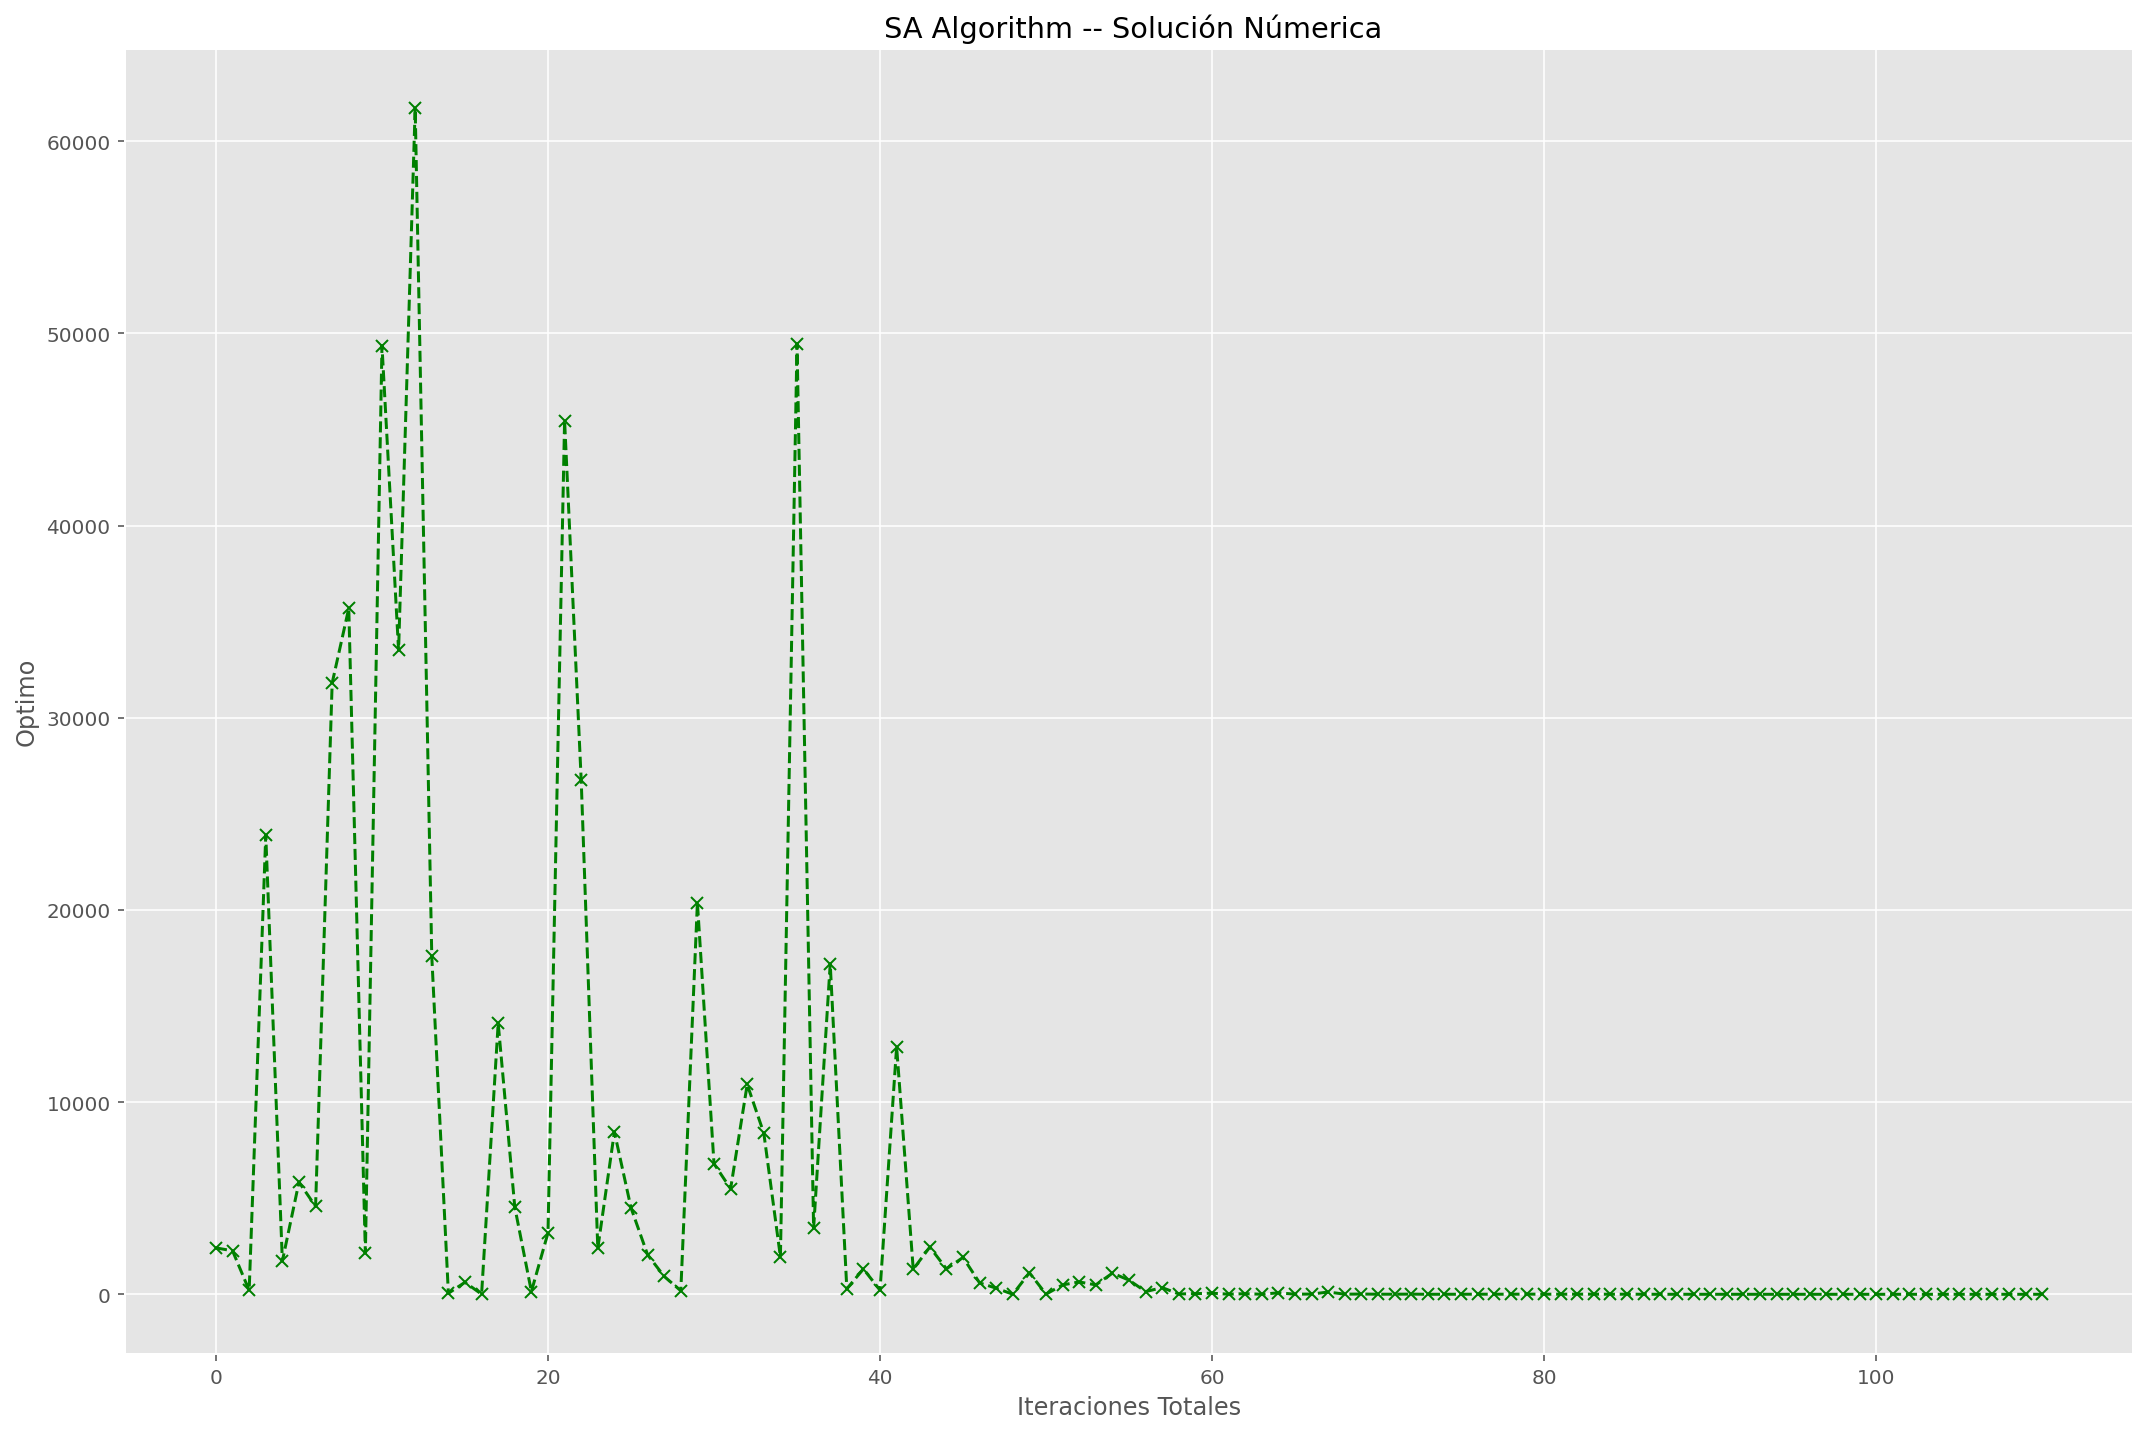

In [36]:
#############################################################################
import time
import math
import numpy as np 
import random

import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm
import matplotlib.gridspec as gridspec
import seaborn as sns

import copy
from tqdm import tqdm

plt.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format ='retina'

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 18, 12

##############################################################################

temperatura_inicial = 400  #PUEDES JUGAR CON LAS TEMPERATURAS A PROBAR
enfriamiento = 0.85  # coeficiente de enfriamiento/disminucion de temperatura
numero_variables = 2
limite_superior = [5, 5]   
limite_inferior = [-5, -5]  
tiempo_computo = 0.5 # segundos 
 
def funcion_objetivo(X):
    x=X[0]
    y=X[1]
    value = ((1- x**2) + 100*(y - x**2)**2) #Funciones Benchmark
    return value
 
#(x**2 + y**2 + 25*(np.sin(x**2) + np.cos(y**2)))puedes probar con esta función objetivo en la sección value donde esta comentado ----> #Funciones Benchmark
#############################################################################

# SA Algorithm:
solucion_inicial = np.zeros((numero_variables))
for v in range(numero_variables):
    solucion_inicial[v] = random.uniform(limite_inferior[v],limite_superior[v])
     
actual_solucion = solucion_inicial
mejor_solucion = solucion_inicial
n = 1  # no de solciones aceptadas
mas_apta = funcion_objetivo(mejor_solucion)
actual_temperatura = temperatura_inicial # temperatura actual
inicio = time.time()
no_intentos = 400 # numero de intentos en cada nivel de temperatura
record_mas_apta =[]
alfa = 0.3
 
for i in range(999999999):
    for j in range(no_intentos):
 
        for k in range(numero_variables):
            actual_solucion[k] = mejor_solucion[k] + alfa*(random.uniform(limite_inferior[k],limite_superior[k]))
            actual_solucion[k] = max(min(actual_solucion[k],limite_superior[k]),limite_inferior[k])  # Obtenemos la solucion respecto a los limites
  
        actual_apta = funcion_objetivo(actual_solucion)
        E = abs(actual_apta - mas_apta)
        if i == 0 and j == 0:
            EA = E
             
        if actual_apta > mas_apta: #Podemos cambiar <> para obtener el maximo o minimo
            p = math.exp(-E/(EA*actual_temperatura))
            # Tomamos la decision de aceptar la peor solucion o no
            if random.random()<p:
                accept = True # Aceptamos la peor solución
            else:
                accept = False # No acepta la peor solución
        else:
            accept = True # Aceptamos la mejor solución
        if accept==True:
            mejor_solucion = actual_solucion # Actualizamos la mejor solucion
            mas_apta = funcion_objetivo(mejor_solucion)
            n = n + 1 # conteo de solciones aceptadas
            EA = (EA *(n-1) + E)/n # actualizamos EA
                                              #mas_apta = optimo
    print('interación: {}, mejor_solución: {}, optimo: {}'.format(i, mejor_solucion, mas_apta))
    record_mas_apta.append(mas_apta)
    # Temperatura de enfriamiento
    actual_temperatura = actual_temperatura*enfriamiento
    # Parar tiempo de computo
    fin = time.time()
    if fin-inicio >= tiempo_computo:
        break
#############################################################################
#Graficos
plt.plot(record_mas_apta, 'g--x')
plt.title(' SA Algorithm -- Solución Númerica')
plt.xlabel('Iteraciones Totales')
plt.ylabel('Optimo')
plt.grid(True)

############################################################################
#Ya podemos usar el algoritmo jaja
#INGENIERÍA QUÍMICA


### Prueba 4

### *Encontrar el maximo de la Función Objetivo*

interación: 0, mejor_solución: [1.75018927 5.        ], optimo: 373.070801811707
interación: 1, mejor_solución: [1.0193687 5.       ], optimo: 1568.8238215428394
interación: 2, mejor_solución: [ 1.74153236 -2.0330845 ], optimo: 2564.4223801389526
interación: 3, mejor_solución: [ 4.99904646 -3.24832496], optimo: 79718.93800083721
interación: 4, mejor_solución: [ 0.73452123 -1.22368119], optimo: 311.34883046029904
interación: 5, mejor_solución: [5.         2.77906924], optimo: 49352.97638457732
interación: 6, mejor_solución: [-2.17014342  4.09938729], optimo: 33.51697150802174
interación: 7, mejor_solución: [1.42792743 3.37328292], optimo: 176.99832317594885
interación: 8, mejor_solución: [4.81501749 2.734814  ], optimo: 41796.34533159145
interación: 9, mejor_solución: [ 4.0688553 -5.       ], optimo: 46448.76238419176
interación: 10, mejor_solución: [ 3.81504154 -4.20188451], optimo: 35166.7989071969
interación: 11, mejor_solución: [-4.39970596  3.16749997], optimo: 26192.9695511273
int

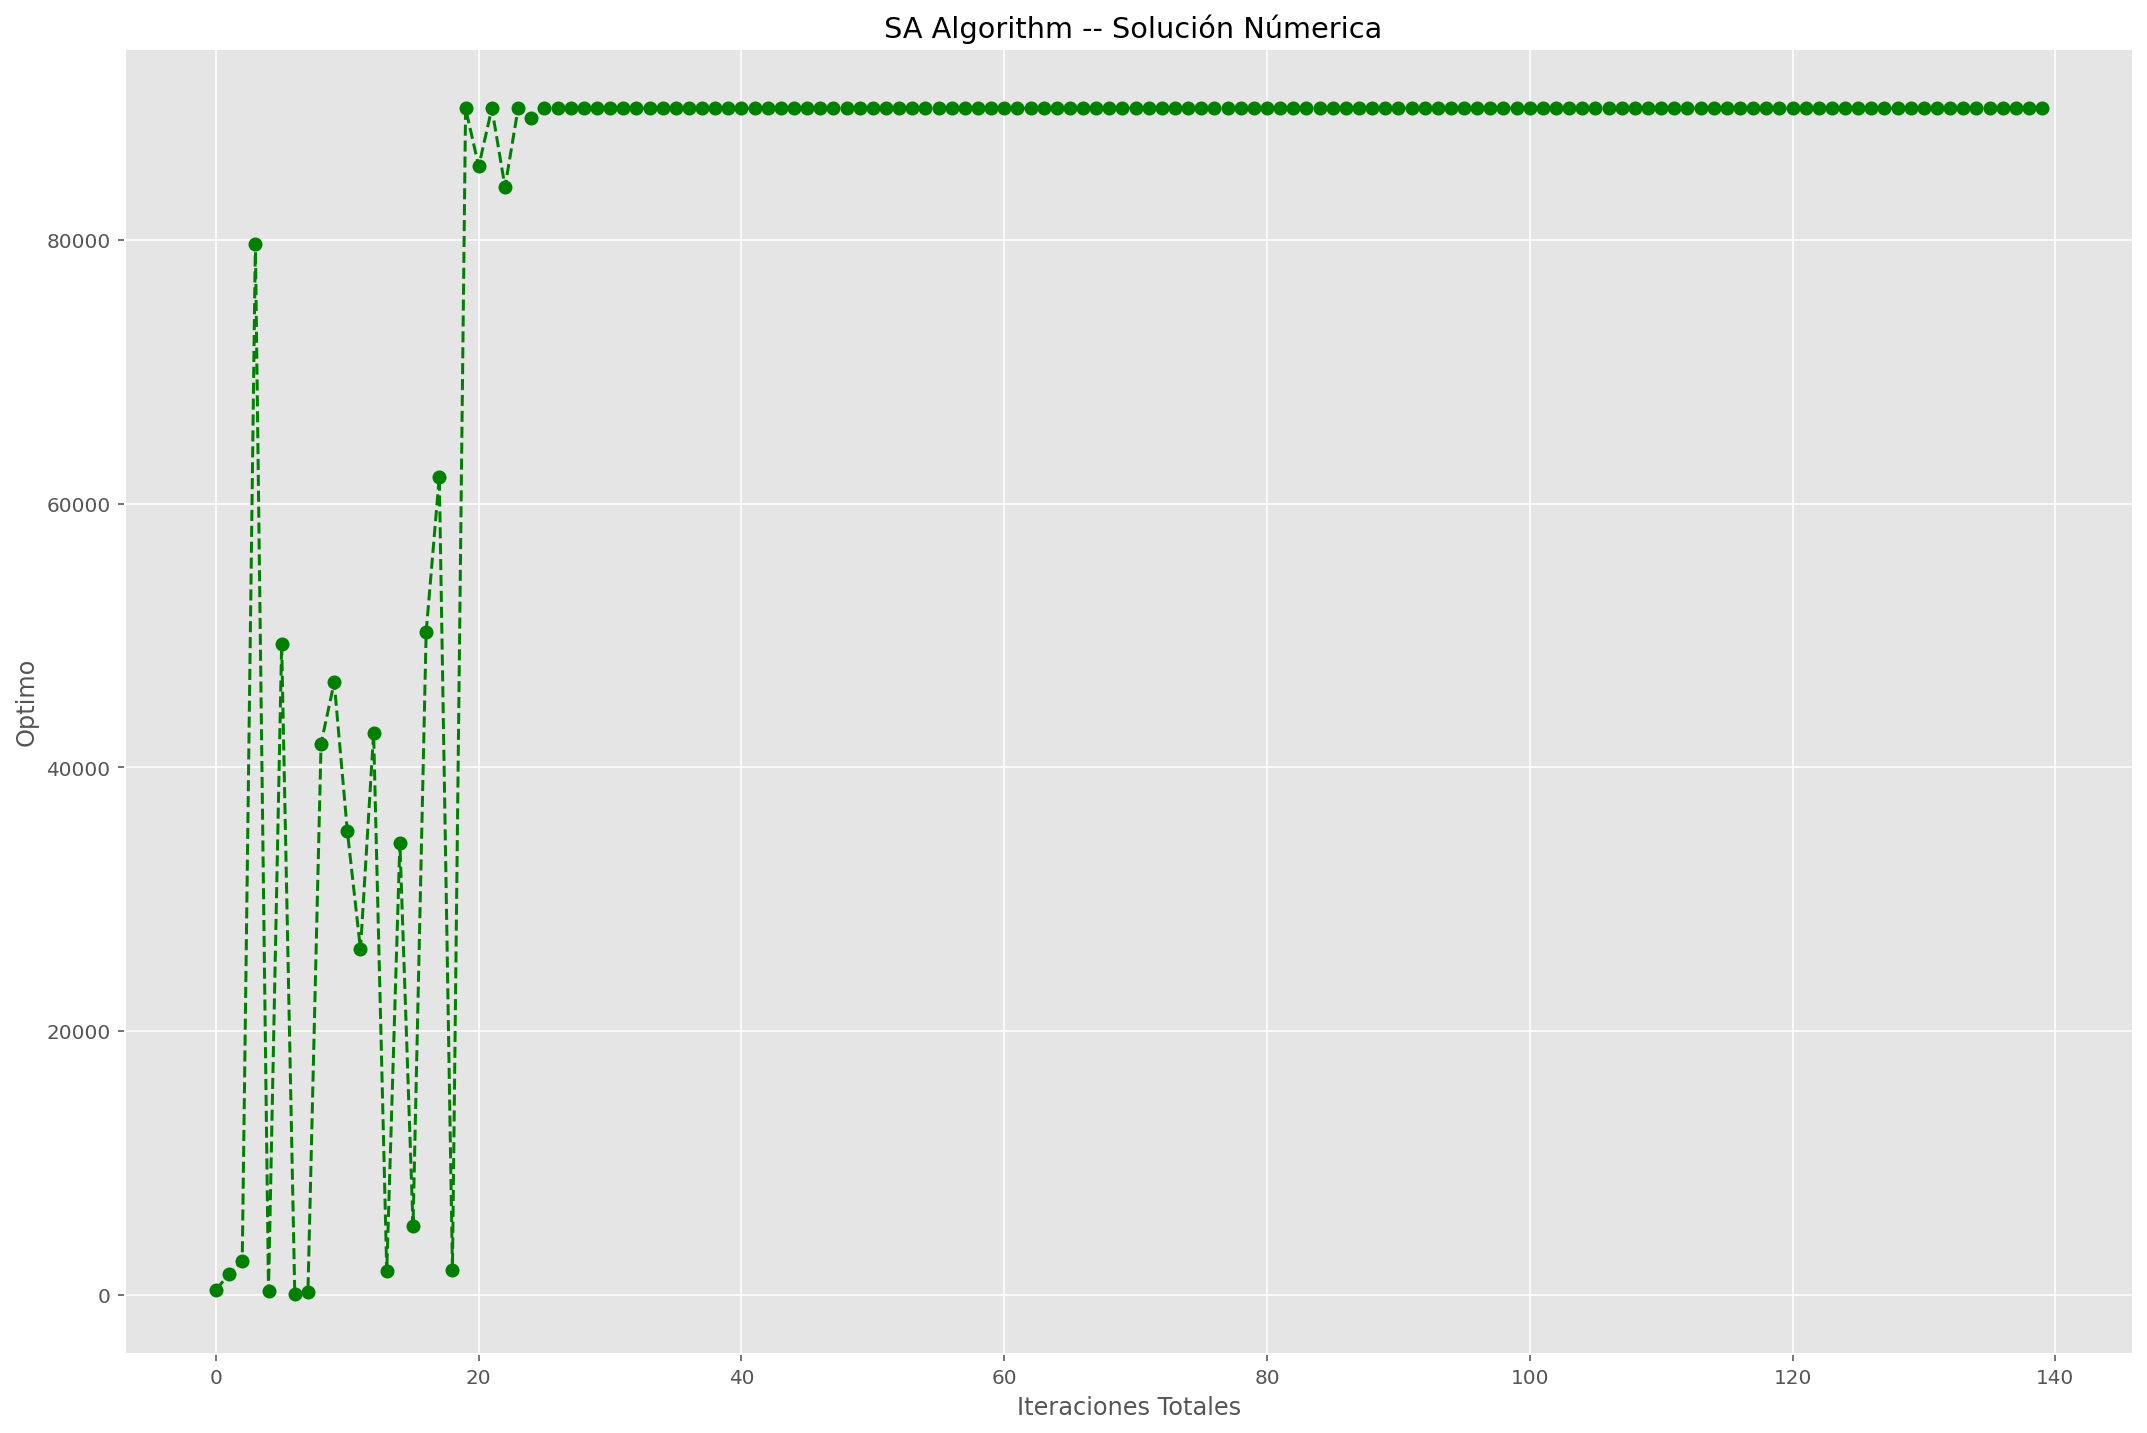

In [47]:
#############################################################################
import time
import math
import numpy as np 
import random

import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm
import matplotlib.gridspec as gridspec
import seaborn as sns

import copy
from tqdm import tqdm

plt.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format ='retina'

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 18, 12

##############################################################################

temperatura_inicial = 700  #PUEDES JUGAR CON LAS TEMPERATURAS A PROBAR
enfriamiento = 0.7  # coeficiente de enfriamiento/disminucion de temperatura
numero_variables = 2
limite_superior = [5, 5]   
limite_inferior = [-5, -5]  
tiempo_computo = 1 # segundos 
 
def funcion_objetivo(X):
    x=X[0]
    y=X[1]
    value = ((1- x**2) + 100*(y - x**2)**2) #Funciones Benchmark
    return value
 
#(x**2 + y**2 + 25*(np.sin(x**2) + np.cos(y**2)))puedes probar con esta función objetivo en la sección value donde esta comentado ----> #Funciones Benchmark
#############################################################################

# SA Algorithm:
solucion_inicial = np.zeros((numero_variables))
for v in range(numero_variables):
    solucion_inicial[v] = random.uniform(limite_inferior[v],limite_superior[v])
     
actual_solucion = solucion_inicial
mejor_solucion = solucion_inicial
n = 1  # no de solciones aceptadas
mas_apta = funcion_objetivo(mejor_solucion)
actual_temperatura = temperatura_inicial # temperatura actual
inicio = time.time()
no_intentos = 700 # numero de intentos en cada nivel de temperatura
record_mas_apta =[]
alfa = 0.4
 
for i in range(999999999):
    for j in range(no_intentos):
 
        for k in range(numero_variables):
            actual_solucion[k] = mejor_solucion[k] + alfa*(random.uniform(limite_inferior[k],limite_superior[k]))
            actual_solucion[k] = max(min(actual_solucion[k],limite_superior[k]),limite_inferior[k])  # Obtenemos la solucion respecto a los limites
  
        actual_apta = funcion_objetivo(actual_solucion)
        E = abs(actual_apta - mas_apta)
        if i == 0 and j == 0:
            EA = E
             
        if actual_apta < mas_apta: #Podemos cambiar <> para obtener el maximo o minimo
            p = math.exp(-E/(EA*actual_temperatura))
            # Tomamos la decision de aceptar la peor solucion o no
            if random.random()<p:
                accept = True # Aceptamos la peor solución
            else:
                accept = False # No acepta la peor solución
        else:
            accept = True # Aceptamos la mejor solución
        if accept==True:
            mejor_solucion = actual_solucion # Actualizamos la mejor solucion
            mas_apta = funcion_objetivo(mejor_solucion)
            n = n + 1 # conteo de solciones aceptadas
            EA = (EA *(n-1) + E)/n # actualizamos EA
                                              #mas_apta = optimo
    print('interación: {}, mejor_solución: {}, optimo: {}'.format(i, mejor_solucion, mas_apta))
    record_mas_apta.append(mas_apta)
    # Temperatura de enfriamiento
    actual_temperatura = actual_temperatura*enfriamiento
    # Parar tiempo de computo
    fin = time.time()
    if fin-inicio >= tiempo_computo:
        break
#############################################################################
#Graficos
plt.plot(record_mas_apta, 'g--o')
plt.title(' SA Algorithm -- Solución Númerica')
plt.xlabel('Iteraciones Totales')
plt.ylabel('Optimo')
plt.grid(True)

############################################################################
#Ya podemos usar el algoritmo jaja
#INGENIERÍA QUÍMICA